In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
v = np.array([[1,2,3]]).T
w = np.array([[10,20]])

v+w

array([[11, 21],
       [12, 22],
       [13, 23]])

# Visualizing matrices as images

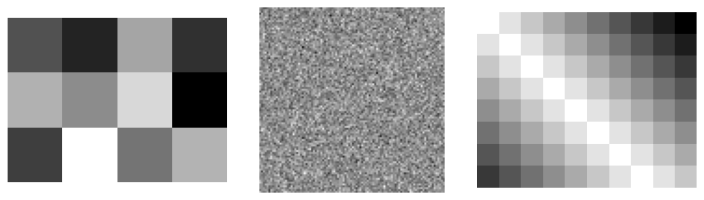

In [3]:
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8), np.arange(10)) #토플리츠 행렬(첫번째 인수(행), 두번째 인수(열) 이용해 대각선이 일정한 패턴을 갖는 행렬)
    # 부호를 반대로 설정하여 대각선이 흰색이 되도록 설정(- 없으면 대각선이 검정색)

fig, axs = plt.subplots(1,3, figsize=(10,3))

axs[0].imshow(A, cmap='gray')
axs[1].imshow(B, cmap='gray')
axs[2].imshow(C, cmap='gray')

for i in range(3) : axs[i].axis('off') #축 제거

plt.tight_layout() # 그래프 간 간격을 자동으로 조정
plt.savefig('Figure_04_01.png', dpi=600)
plt.show()

# Slicing out rows and columns

In [4]:
A = np.reshape(np.arange(1,10), (3,3)) # 1~10까지의 1차원 정수 배열을 3*3 행렬로 변환

print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
print(A[1,:])

print(A[1])

[4 5 6]
[4 5 6]


In [6]:
print(A[:,1])

[2 5 8]


In [7]:
A[:,1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [8]:
print(A[0:2, 1:2])


[[2]
 [5]]


In [9]:
print(A[0:2:1, 0:2:1]) #[start : stop : step] = [시작 : 종료 : 간격]

[[1 2]
 [4 5]]


In [10]:
A = np.arange(60).reshape(6,10)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

In [11]:
sub = A[1:4:1 , 0:5:1]

sub

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

# Some special matrices

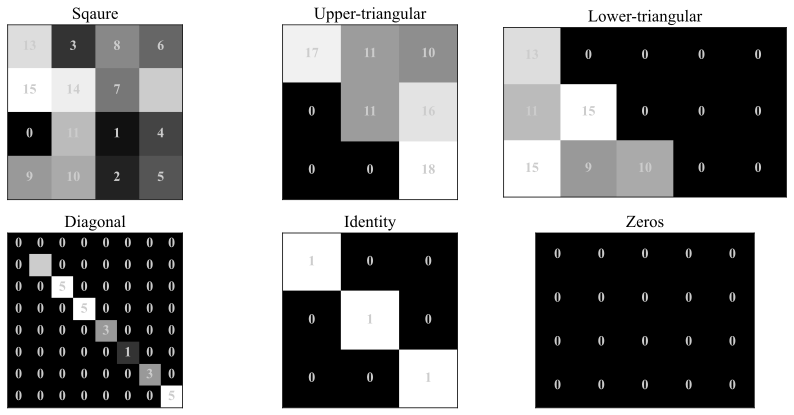

In [12]:
#square
M1 = np.random.permutation(16).reshape(4,4)

#upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3)))

#lower-triangular square
M3 = np.tril(np.random.randint(8,16, (3,5)))

#diagonal
M4 = np.diag(np.random.randint(0,6, size=8)) #8*8

#ientity
M5 = np.eye(3,dtype=int)

#zeros
M6 = np.zeros((4,5), dtype=int)

matrices = [M1, M2, M3, M4, M5, M6]
matLabels = ['Sqaure', 'Upper-triangular', 'Lower-triangular', 'Diagonal', 'Identity', 'Zeros']

_, axs = plt.subplots(2,3, figsize=(12,6)) # _ : figure 객체(전체 그림 조작할 때 필요)를 무시하고 가져오지 않겠다는 의미(axs(개별 서브플롯 조작할 때 필요)만 사용함)
axs = axs.flatten()

for mi, M in enumerate(matrices): #mi : matrix index, M : matrix
    axs[mi].imshow(M, cmap='gray', origin='upper', vmin=np.min(M), vmax=np.max(M)) #origin='upper' = (0,0)위치가 이미지의 왼쪽 위에 오도록 설정, vmin&vmax = 행렬의 최소값과 최대값을 기준으로 명암조정

    axs[mi].set(xticks=[], yticks=[]) # 축제목 제거
    axs[mi].set_title(matLabels[mi])

    for (j,i), num in np.ndenumerate(M): #행렬의 각 요소에 대해 좌표 (j,i), num을 반환(다차원 배열을 인덱스와 값으로 순회)
        axs[mi].text(i,j,num,color=[.8,.8,.8], ha='center', va='center', fontweight='bold')

plt.savefig('Figure_04_02.png', dpi=600)
plt.tight_layout()
plt.show()


# Some more details about special matrices

In [13]:
# matrix size parameters

Mrows = 4
Ncols = 6

A = np.random.randn(Mrows, Ncols)

np.round(A,3)

array([[ 0.759, -0.164, -0.418, -0.211, -0.249, -0.853],
       [-0.966,  1.46 ,  2.432,  0.178, -0.85 ,  0.901],
       [ 0.586,  0.927,  1.081, -0.417,  0.38 , -1.63 ],
       [ 1.126,  0.339, -0.862, -2.201,  0.503, -0.03 ]])

In [14]:
# Extract the triangular part of a dense matrix

M = 4
N = 6

A = np.random.randn(M,N)

print('Upper triangular:\n')
print(np.triu(A))

print('Lower triangular:\n')
print(np.tril(A))

Upper triangular:

[[-0.9199728  -0.86210638  0.47294264  0.20926223 -1.28899353  1.04971595]
 [ 0.         -1.36745472  1.0926435  -0.05234921  0.70298258  0.65945909]
 [ 0.          0.          0.86113961  0.617787   -0.00708174 -0.25006205]
 [ 0.          0.          0.         -0.2506682  -0.01451307 -0.29254625]]
Lower triangular:

[[-0.9199728   0.          0.          0.          0.          0.        ]
 [-0.03972233 -1.36745472  0.          0.          0.          0.        ]
 [-0.64200347  0.64902419  0.86113961  0.          0.          0.        ]
 [ 0.18279216  1.28434408  0.15268297 -0.2506682   0.          0.        ]]


In [15]:
# Diagonal

A = np.random.randn(5,5)
d = np.diag(A)

print('Original :\n', A)
print('\n\nInput a matrix :\n', d)

# OR input a vector to create a diagonal matrix

v = np.arange(1,6)
D = np.diag(v)

print('\n\nInput vector :', v)
print('\n\nInput a vector :\n', D)

Original :
 [[ 1.02445935 -0.51248666  0.35784977  0.85393097  0.43171314]
 [-1.39144802 -1.81021076 -2.03666295  0.64159289 -1.15813795]
 [-1.13294757  0.38139069  0.65774982 -0.42824524  0.13244949]
 [ 0.46289134  1.03217394  0.79378368 -0.27544412 -0.848369  ]
 [-0.52622292 -0.61500243 -1.57788745 -0.72488667 -1.51655465]]


Input a matrix :
 [ 1.02445935 -1.81021076  0.65774982 -0.27544412 -1.51655465]


Input vector : [1 2 3 4 5]


Input a vector :
 [[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [16]:
# Identity matrices

n = 4
I = np.eye(n) #np.identity() 가 항상 정사각행렬을 만드는 반면 np.eye는 비정사각 행렬도 만들 수 있음(I와 발음 유사)

print(f'The {n}x{n} identity matix :\n', I)

The 4x4 identity matix :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [17]:
#Zero matries

n = 4
m = 5
I = np.zeros((n,m))

print(f'The {n}x{m} zeros matrix :\n', I)

The 4x5 zeros matrix :
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Matrix addition

In [18]:
A = np.array([ [2,3,4],
              [1,2,4]])

B = np.array(( [0,3,1],
              [-1,-4,2]))


print(A+B)

[[ 2  6  5]
 [ 0 -2  6]]


## Shifting a matrix

In [19]:
3 + np.eye(2)

array([[4., 3.],
       [3., 4.]])

In [20]:
A = np.array([ [4,5,1],
              [0,1,11],
              [4,9,7]])

s = 6

print('Original matrix : ')
print(A), print('  ')

print('Broadcasting addition : ')
print(A+s), print('   ')

print('Shifting : ') #행렬의 대각선 요소를 특정 값으로 이동(변경)
print(A + s*np.eye(len(A)))

Original matrix : 
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
  
Broadcasting addition : 
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]
   
Shifting : 
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


## Scalar multiplication

In [21]:
print(A), print('  ')

print(s*A)

[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
  
[[24 30  6]
 [ 0  6 66]
 [24 54 42]]


## Hadamard multiplication

In [22]:
A = np.random.randn(3,4)
B = np.random.randn(3,4)

print(A*B) #요소별 곱셈
print('\n\n')
print(np.multiply(A,B)) #요소별 곱셈
print('\n\n')
print(A@B) #행렬곱 -> 첫행렬의 열 개수와 두번째 행렬의 행의 개수가 같아야 가능

[[ 1.84148516  1.10671601  0.56890558  0.85610916]
 [ 0.12653025 -0.14411176  0.05288685 -0.66130048]
 [-0.10578184  1.95036707 -0.135187   -0.02236657]]



[[ 1.84148516  1.10671601  0.56890558  0.85610916]
 [ 0.12653025 -0.14411176  0.05288685 -0.66130048]
 [-0.10578184  1.95036707 -0.135187   -0.02236657]]





ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

# "Standard" matrix multiplication

In [26]:
A = np.random.randn(3,6)
B = np.random.randn(6,4)
C = np.random.randn(6,4)

print((A@B).shape) # 3*4
print(np.dot(A,B).shape) # 3*4
print((A@C).shape) #3*4
print((B@C).shape) #오류 발생

(3, 4)
(3, 4)
(3, 4)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 4)

In [27]:
print(np.multiply(B,C)) , print('  ') #6*4 행렬곱
print(np.dot(B,C.T)) #6*6 내적

[[-0.46249429  1.00442413  0.38108049 -0.00259591]
 [-0.2851073   0.05471456 -0.76743454 -0.04307875]
 [-1.92434169 -0.05623915  0.03273876  0.00718711]
 [ 2.04048537  0.08234183 -0.32926437 -0.77235411]
 [ 0.18456113 -0.70057499 -0.07850894 -0.21975126]
 [ 1.36806802  0.1230088   0.54266531  0.24981396]]
  
[[ 0.92041442 -0.07807797 -0.49492625  1.65596754  1.29893858  0.10061776]
 [-1.16874601 -1.04090604 -0.46601277  0.8891489  -0.18702283 -1.2137416 ]
 [-1.44878637 -1.01173401 -1.94065497  2.78008227  0.1137628  -1.85878372]
 [ 0.17810794 -0.48841171 -1.78459705  1.02120872 -0.48969671  0.24508074]
 [-0.84376383 -0.10301276 -1.85013259  1.1298136  -0.81427407 -0.60217893]
 [ 1.94242354  1.04265309  1.47130897 -2.51572234 -0.05807282  2.28355609]]


# Geometry of matrix-vector multiplication

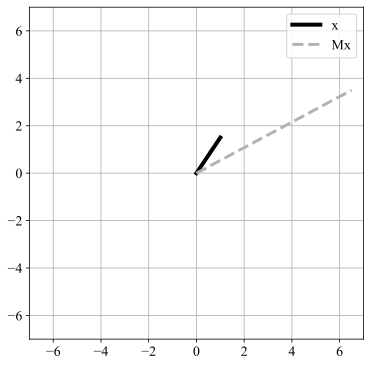

In [30]:
M = np.array([[2,3], [2,1]])
x = np.array([[1,1.5]]).T
Mx = M@x

plt.figure(figsize=(6,6))

plt.plot([0,x[0,0]], [0, x[1,0]], 'k', linewidth=4, label='x')
plt.plot([0, Mx[0,0]], [0, Mx[1,0]], '--', linewidth=3, color=[.7,.7,.7], label='Mx')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_04_05a.png', dpi=300)
plt.show()

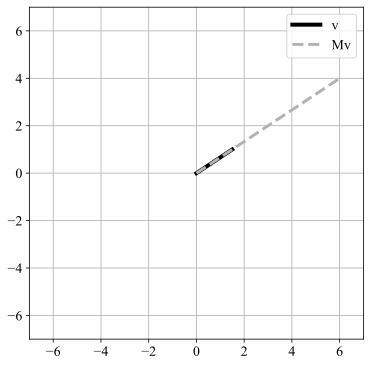

In [31]:
M = np.array([[2,3], [2,1]])
v = np.array([[1.5,1]]).T
Mv = M@v

plt.figure(figsize=(6,6))

plt.plot([0,v[0,0]], [0, v[1,0]], 'k', linewidth=4, label='v')
plt.plot([0, Mv[0,0]], [0, Mv[1,0]], '--', linewidth=3, color=[.7,.7,.7], label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.savefig('Figure_04_05b.png', dpi=300)
plt.show()

# Transpose

In [33]:
A = np.array([[3,4,5], [1,2,3]])

A_T1 = A.T
A_T2 = np.transpose(A)

A_TT = A_T1.T

print(A_T1) , print('  ')
print(A_T2) , print('  ')
print(A_TT)

[[3 1]
 [4 2]
 [5 3]]
  
[[3 1]
 [4 2]
 [5 3]]
  
[[3 4 5]
 [1 2 3]]
